# Week 11 Optimization
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 5.4.2017  
Helsinki Metropolia University of Applied Sciences

In [25]:
# Initial import statements
%pylab inline
from scipy.optimize import newton, minimize

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


___
## Exercise 1  
Given $f(x) = - 1.5x^6  - 2x^4 + 12x$  
(a) Plot the function.  
(b) Differentiate the function and then use a root location method to solve for the maximum $f(x)$ and the corresponding value of $x$.  
(c) Use `minimize` function from `scipy.optimize` to find the maximimum of the function.  

## Solution  
(a) First we define function $f$ then plot it in the domain $[-2, 2]$.  
(b) First we differentiate $f(x)$: $\dfrac{df}{dx} = -9 x^5 - 8 x^4 + 12$  
We will use the function `newton` from `scipy.optimize` to find the value of $x$ that $f(x)$ has the maximum value. Finally we calculate $f(x)$ to get the maximum value of the function.  
(c) First we need to define a function `nf` which is the reflection of $f(x)$ over the $x$ axis, so that we could use `minimize` function from `scipy.optimize` to find the value of $x$ that $nf(x)$ gets the minimum value and $f(x)$ gets the maximum value. Finally we plug $x$ into $f(x)$ to get the maximum value of the function.  

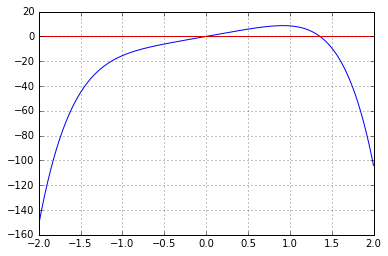

In [26]:
# a
f = lambda x : -1.5 * x**6 - 2 * x**4 + 12 * x

figure()
x = linspace(-2, 2, 1000)
plot(x, f(x))
axhline(0, color = 'r')
grid()
show()

In [27]:
# b
df = lambda x : -9 * x**5 - 8 * x**3 + 12
x0 = newton(df, 1, tol=0.01)
print("Maximum value found by scipy.optimize.newton:")
print("\tx0 = {0:.6f}".format(x0))
print("\tf(x0) = {0:.6f}".format(f(x0)))

Maximum value found by scipy.optimize.newton:
	x0 = 0.918356
	f(x0) = 8.697876


In [28]:
# c
nf = lambda x : -f(x)
x0_true = minimize(nf, 1).x[0]
print("Maximum value found by scipy.optimize.minimize:")
print("\tx0 = {0:.6f}".format(x0_true))
print("\tf(x0) = {0:.6f}".format(f(x0)))

Maximum value found by scipy.optimize.minimize:
	x0 = 0.916915
	f(x0) = 8.697876


___
## Exercise 2  
Solve the problem 1 using the golden-section search. Use initial guesses of $x_l = 0.0$ and $x_h = 2.0$. Perform 30 iterations. How accurate the results is then?  

## Solution  
First we need to implement function `gss` that uses the golden-section search method. We get the function from an article on `wikipedia`.  
Then, we call the function with the $a = 0.0, b = 2.0,$ `maxiter` $= 30$.  
Finally we get the true error from our solution with the value of $x$ we get from `scipy.optimize.minimize` in the last exercise.  

In [29]:
'''
https://en.wikipedia.org/wiki/Golden-section_search
python program for golden section search
'''
gr = (math.sqrt(5) + 1) / 2

def gss(f, a, b, tol=1e-10, maxiter = 1000):
    '''
    golden section search
    to find the minimum of f on [a,b]
    f: a strictly unimodal function on [a,b]
    '''
    n = 0
    c = b - (b - a) / gr
    d = a + (b - a) / gr 
    while abs(c - d) > tol and n < maxiter:
        if f(c) < f(d):
            b = d
        else:
            a = c
        
        # we recompute both c and d here to avoid loss of precision which may lead to incorrect results or infinite loop
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        n += 1

    return ((b + a) / 2, n)

x0, n = gss(nf, 0, 2, maxiter = 30)
te = abs(x0 - x0_true) # true error

print("Maximum value found by golden-section search:")
print("\tx0 = {0:.8f}".format(x0))
print("\tf(x0) = {0:.8f}".format(f(x0)))
print("\tTrue error = {0:.8f}".format(te))

Maximum value found by golden-section search:
	x0 = 0.91691542
	f(x0) = 8.69792983
	True error = 0.00000029


___
## Exercise 3  
Solve the problem 1 using parabolic interpolation method. Use initial guesses $x_0 = 0.0, x_1 = 1.0$ and $x_2 = 2.0$. Iterate until you reach the same accuracy as in previous problem. Did the parabolic interpolation find the solution with less or more iterations?

## Solution  
First we need to implement a function that uses the parabolic interpolation method.  
Then, we call the function with the  $x_0 = 0.0, x_1 = 1.0$, $x_2 = 2.0$ and `tol` equals the true error value we got from the previous exercise.  
Finally we print out the value of $x_0$ and the number of iterations needed to reach the same accurarcy as in the previous problem. We could see that it took less iterations.  

In [30]:
def parabolicInterpolation(f, x0, x1, x2, tol = 1e-8, maxiter = 100):
    n = 0
    while abs(x2 - x0) > tol and n < maxiter: 
        n += 1
        x3 =  (f(x0) * (x1**2 - x2**2) + f(x1) * (x2**2 - x0**2) + f(x2) * (x0**2 - x1**2)) \
                    / (2 * (f(x0) * (x1 - x2) + f(x1) * (x2 - x0) + f(x2) * (x0 - x1)))
        if x3 > x1:
            x0, x1 = x1, x3
        else:
            x1, x2 = x3, x1

    return x1, n

x0, n = parabolicInterpolation(nf, 0, 1, 2, tol = te)
print("Maximum value found by parabolic interpolation method:")
print("\tx0 = {0:.8f}".format(x0))
print("\tNumber of steps n = {}".format(n))

Maximum value found by parabolic interpolation method:
	x0 = 0.91691515
	Number of steps n = 21


___
## Exercise 4  
Solve the problem 1 using Newton-Raphson optimization method. Use initial guess of $x_0 = 2.0$. How many iterations are needed to achieve the same accuracy as in previous problems?

## Solution  
First we need to define 2 helper functions to estimate the derivative and second derivative of $f(x)$ at a point $x_0$.  
Then we implement a neat function using Newton-Raphson method thanks to the 2 helper functions.  
Next, we call the function with the  $x_0 = 2.0$ and `tol` equals the true error value we got from exercise 2.  
Finally we print out the value of $x_0$ and the number of iterations needed to reach the same accurarcy as exercise 2. We could see that it took less iterations than the previous problems.  

In [31]:
def derivative(f, x, h = 1e-8):
    """ 
    Inputs:
       f = the function 
       x = point to estimate the derivative on
       h = small number, default value 1e-8
    Outputs:
       df = estimate of the derivative of f at point x
    """
    df = (f(x + h) - f(x)) / h
    return df

def secondDerivative(f, x, h = 1e-8):
    """ 
    Inputs:
       f = the function 
       x = point to estimate the 2nd derivative on
       h = small number, default value 1e-8
    Outputs:
       df = estimate of the 2nd derivative of f at point x
    """
    ddf = (f(x + 2 * h) - 2 * f(x + h) + f(x)) / h**2
    return ddf

def newtonSearch(f, x0, tol = 1e-10, maxiter = 10000):
    """ 
    Inputs:
       f = the function 
       x0 = initial estimate of a extremum
       tol = tolerance for the extremum value
       maxiter = maximum numbers of iterations
    Outputs:
       x0 = estimate for the extremum
       n = number of iterations
    """
    n = 0
    while(abs(derivative(f, x0)) > tol and n < maxiter):
        n += 1
        fpp = secondDerivative(f, x0)
        if fpp != 0:
            x0 = x0 - derivative(f, x0) / fpp
        else:
            x0 += tol
    return x0, n 



In [32]:
x0, n = newtonSearch(f, 2.0, tol = te)
print("\tRoot x0 = {0:.7f}".format(x0))
print("\tNumber of steps n = {}".format(n))

	Root x0 = 0.9169152
	Number of steps n = 11


___
## Exercise 5  
Employ the following methods to find the maximum of
$f(x) = 4x − 1.8x^2 + 1.2x^3 − 0.3x^4 \tag*{}$  
  
(a) Golden-section method $(x_l = −2.0, x_u = 4.0, \epsilon_s = 0.0001)$.  
(b) Parabolic interpolation $(x_0 = 1.74, x_1 = 2.0, x_2 = 2.5, iterations = 20)$.  
(c) Newton-Raphson method $(x_0 = 3, \epsilon_s  = 0.0001)$.  

## Solution  
First we plot the function to get the intuition of where the maximum locate.  
Then, we plug the required arguments into the functions we have implemented above.  
The results we got are quite similar and look resonable on the graph. 

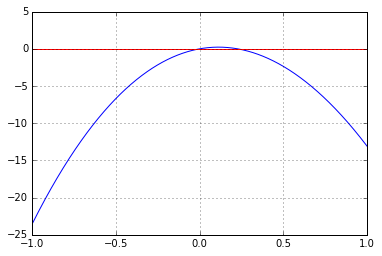

In [33]:
f = lambda x : 4 * x - 18 * x**2 + 1.2 * x**3 - 0.3 * x**4
nf = lambda x : -f(x)

figure()
x = linspace(-1, 1, 1000)
plot(x, f(x))
axhline(0, color = 'r')
grid()
show()

In [34]:
f = lambda x : 4 * x - 18 * x**2 + 1.2 * x**3 - 0.3 * x**4
nf = lambda x : -f(x)

print("Maximum found by golden-section method:")
x0, n = gss(nf, -2, 4, tol = 0.0001)
print("\tRoot x0 = {0:.7f}".format(x0))
print("\tNumber of steps n = {}".format(n))

Maximum found by golden-section method:
	Root x0 = 0.1123780
	Number of steps n = 20


In [35]:
print("Maximum found by parabolic interpolation:")
x0, n = parabolicInterpolation(f, 1.74, 2, 2.5)
print("\tRoot x0 = {0:.7f}".format(x0))
print("\tNumber of steps n = {}".format(n))

Maximum found by parabolic interpolation:
	Root x0 = 0.1123255
	Number of steps n = 13


In [36]:
print("Maximum found by Newton-Raphson method:")
x0, n = newtonSearch(f, 3, tol = 1e-4)
print("\tRoot x0 = {0:.7f}".format(x0))
print("\tNumber of steps n = {}".format(n))

Maximum found by Newton-Raphson method:
	Root x0 = 0.1123255
	Number of steps n = 291
